#SaleMetricsDashboard

projectStudio is assigned the task to identify the key insights and The aim of this project is to use Python, SQL, Excel and Power bi to analyze sales data and generate meaningful reports for a retail chain team.


## Data Cleaning and Preparation

In [193]:
#Installing/Import libraries
import pandas as pd

In [194]:
#Load the data
txrn = pd.read_csv('Retail_Data_Transactions.csv')
txrn

,customer_id,trans_date,tran_amount
0,CS5295,02-11-2013,35
1,CS4768,03-15-2015,39
2,CS2122,02-26-2013,52
3,CS1217,11-16-2011,99
4,CS1850,11-20-2013,78
...,...,...,...
124964,CS8433,06-26-2011,64
124965,CS7232,08-19-2014,38
124966,CS8731,11-28-2014,42
124967,CS8133,12-14-2013,13


In [195]:
response = pd.read_csv('Retail_Data_Response.csv')
response

C:\Users\HP\AppData\Local\Temp\ipykernel_8656\448442365.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  response = pd.read_csv('Retail_Data_Response.csv')


,customer_id,month,response
0,CS5295,2,1.0
1,CS4768,2,1.0
2,CS2122,2,0.0
3,CS1217,2,0.0
4,CS1850,2,0.0
...,...,...,...
1048570,NaN,7,NaN
1048571,NaN,7,NaN
1048572,NaN,7,NaN
1048573,NaN,7,NaN


In [196]:
#Merging both the tables
df = txrn.merge(response, on='customer_id', how= 'left')
df

,customer_id,trans_date,tran_amount,month,response
0,CS5295,02-11-2013,35,2,1.0
1,CS5295,02-11-2013,35,12,1.0
2,CS5295,02-11-2013,35,9,1.0
3,CS5295,02-11-2013,35,6,1.0
4,CS5295,02-11-2013,35,3,1.0
...,...,...,...,...,...
2453632,CS7996,12-13-2014,36,2,0.0
2453633,CS7996,12-13-2014,36,12,0.0
2453634,CS7996,12-13-2014,36,2,0.0
2453635,CS7996,12-13-2014,36,1,0.0


In [197]:
#Features/Inspenction of the data
df.dtypes
df.shape
df.head()
df.tail()

,customer_id,trans_date,tran_amount,month,response
2453632,CS7996,12-13-2014,36,2,0.0
2453633,CS7996,12-13-2014,36,12,0.0
2453634,CS7996,12-13-2014,36,2,0.0
2453635,CS7996,12-13-2014,36,1,0.0
2453636,CS7996,12-13-2014,36,12,0.0


In [198]:
df.describe()

,tran_amount,month,response
count,2.453637e+06,2.453637e+06,2.453637e+06
mean,6.641977e+01,6.657234e+00,1.256673e-01
std,2.235469e+01,3.487035e+00,3.314741e-01
min,1.000000e+01,1.000000e+00,0.000000e+00
25%,4.900000e+01,4.000000e+00,0.000000e+00
50%,6.600000e+01,7.000000e+00,0.000000e+00
75%,8.500000e+01,1.000000e+01,0.000000e+00
max,1.050000e+02,1.200000e+01,1.000000e+00


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2453637 entries, 0 to 2453636
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   customer_id  object 
 1   trans_date   object 
 2   tran_amount  int64  
 3   month        int64  
 4   response     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 93.6+ MB


In [200]:
df.shape

(2453637, 5)

In [201]:
pd.isnull(df)

,customer_id,trans_date,tran_amount,month,response
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
2453632,False,False,False,False,False
2453633,False,False,False,False,False
2453634,False,False,False,False,False
2453635,False,False,False,False,False


In [202]:
#HANDLING MISSING VALUES/Identifying missing data
df.isnull().sum()

customer_id    0
trans_date     0
tran_amount    0
month          0
response       0
dtype: int64

In [203]:
df.dtypes

customer_id     object
trans_date      object
tran_amount      int64
month            int64
response       float64
dtype: object

In [204]:
df.columns

Index(['customer_id', 'trans_date', 'tran_amount', 'month', 'response'], dtype='object')

In [205]:
# used describe() for specific columns
df[['month','response', 'tran_amount']].describe()

,month,response,tran_amount
count,2.453637e+06,2.453637e+06,2.453637e+06
mean,6.657234e+00,1.256673e-01,6.641977e+01
std,3.487035e+00,3.314741e-01,2.235469e+01
min,1.000000e+00,0.000000e+00,1.000000e+01
25%,4.000000e+00,0.000000e+00,4.900000e+01
50%,7.000000e+00,0.000000e+00,6.600000e+01
75%,1.000000e+01,0.000000e+00,8.500000e+01
max,1.200000e+01,1.000000e+00,1.050000e+02


In [206]:
#Removing rows with missing values
df = df.dropna()
df

,customer_id,trans_date,tran_amount,month,response
0,CS5295,02-11-2013,35,2,1.0
1,CS5295,02-11-2013,35,12,1.0
2,CS5295,02-11-2013,35,9,1.0
3,CS5295,02-11-2013,35,6,1.0
4,CS5295,02-11-2013,35,3,1.0
...,...,...,...,...,...
2453632,CS7996,12-13-2014,36,2,0.0
2453633,CS7996,12-13-2014,36,12,0.0
2453634,CS7996,12-13-2014,36,2,0.0
2453635,CS7996,12-13-2014,36,1,0.0


In [207]:
#Change Data Types
from datetime import datetime
df['trans_date']= pd.to_datetime(df['trans_date'], format="%m-%d-%Y")
df['response']= df['response'].astype('int64')

In [208]:
df

,customer_id,trans_date,tran_amount,month,response
0,CS5295,2013-02-11,35,2,1
1,CS5295,2013-02-11,35,12,1
2,CS5295,2013-02-11,35,9,1
3,CS5295,2013-02-11,35,6,1
4,CS5295,2013-02-11,35,3,1
...,...,...,...,...,...
2453632,CS7996,2014-12-13,36,2,0
2453633,CS7996,2014-12-13,36,12,0
2453634,CS7996,2014-12-13,36,2,0
2453635,CS7996,2014-12-13,36,1,0


In [209]:
set(df['response'])

{0, 1}

In [210]:
df.dtypes

customer_id            object
trans_date     datetime64[ns]
tran_amount             int64
month                   int64
response                int64
dtype: object

In [211]:
df['tran_amount'].std()

22.35468618457155

In [212]:
df['tran_amount'].sum()

162970007

In [213]:
df['tran_amount'].mean()

66.41977073218247

In [214]:
#check for outliers
#Z-score

from scipy import stats
import numpy as np

#calc z score
z_scores = np.abs(stats.zscore(df['tran_amount']))

#set a threshold

threshold = 3

outliers= z_scores>threshold

print(df[outliers])


Empty DataFrame
Columns: [customer_id, trans_date, tran_amount, month, response]
Index: []


In [215]:
#check for outliers
#Z-score

from scipy import stats
import numpy as np

#calc z score
z_scores = np.abs(stats.zscore(df['response']))

#set a threshold

threshold = 3

outliers= z_scores>threshold

print(df[outliers])

Empty DataFrame
Columns: [customer_id, trans_date, tran_amount, month, response]
Index: []


c:\Users\HP\Documents\GitHub\reatil-Sale-Project\.env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


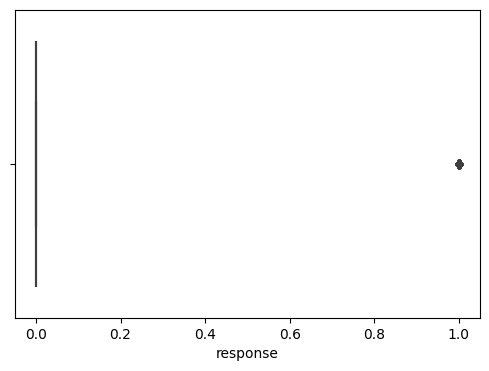

c:\Users\HP\Documents\GitHub\reatil-Sale-Project\.env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


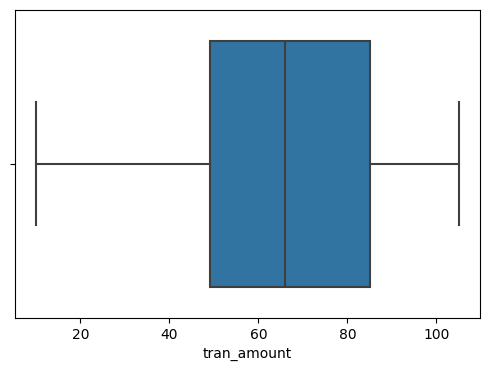

In [216]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.boxplot(x=df['response'])
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x=df['tran_amount'])
plt.show()

In [217]:
#Creating new Columns
df['month'] = df['trans_date'].dt.month
df

,customer_id,trans_date,tran_amount,month,response
0,CS5295,2013-02-11,35,2,1
1,CS5295,2013-02-11,35,2,1
2,CS5295,2013-02-11,35,2,1
3,CS5295,2013-02-11,35,2,1
4,CS5295,2013-02-11,35,2,1
...,...,...,...,...,...
2453632,CS7996,2014-12-13,36,12,0
2453633,CS7996,2014-12-13,36,12,0
2453634,CS7996,2014-12-13,36,12,0
2453635,CS7996,2014-12-13,36,12,0


In [218]:
#Weekly Sales 
weekly_sales = df.set_index('trans_date').resample('W')['tran_amount'].sum().reset_index()
weekly_sales

AttributeError: module 'numpy' has no attribute 'matrix'

In [ ]:
#which 3 months have had the highest transaction amount?
monthly_sales = df.groupby('month')['tran_amount'].sum()
monthly_sales = monthly_sales.sort_values(ascending=False).reset_index().head(3)
monthly_sales

month
8     14571068
10    14520390
1     14508444
Name: tran_amount, dtype: int64

In [ ]:
#customer having highest number of orders.
customer_counts = df['customer_id'].value_counts().reset_index()
customer_counts.columns= ['customer_id','counts']
customer_counts

#top 5 customers
top_5_cust = customer_counts.sort_values(by='counts', ascending = False).head(5)
top_5_cust

AttributeError: module 'numpy' has no attribute 'matrix'

In [ ]:
#barplot
sns.barplot(x='customer_id', y='counts',data=top_5_cust)

ValueError: Could not interpret input 'customer_id'

In [ ]:
#customer having highest value of orders.

customer_sales = df.groupby('customer_id')['tran_amount'].sum().reset_index()
customer_sales

#top 5 customers

top_5_sal = customer_sales.sort_values(by='tran_amount', ascending = False).head(5)
top_5_sal


,customer_id,tran_amount
3312,CS4424,114387
3208,CS4320,100586
2687,CS3799,90468
3997,CS5109,87710
4640,CS5752,86196


c:\Users\HP\Documents\GitHub\reatil-Sale-Project\.env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\Documents\GitHub\reatil-Sale-Project\.env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\Documents\GitHub\reatil-Sale-Project\.env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


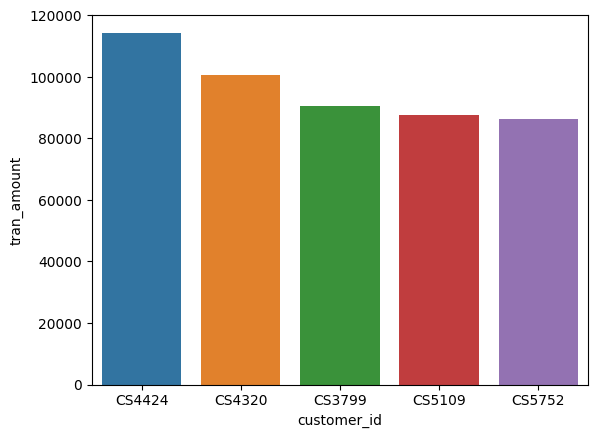

<Figure size 700x100 with 0 Axes>

In [ ]:
#barplot

sns.barplot(x='customer_id', y='tran_amount', data= top_5_sal)
plt.figure(figsize=(7,1))
plt.show()


# Data Analysis

### Advanced Analytics 

### Time Series Analysis

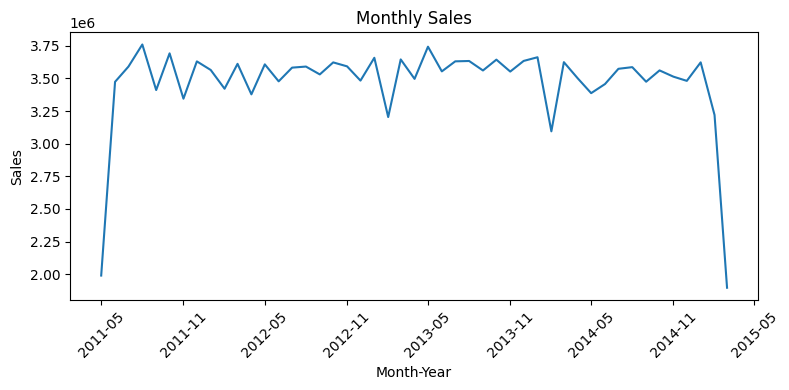

In [ ]:
import matplotlib.dates as mdates

df['month_year']= df['trans_date'].dt.to_period('M')
monthly_sales = df.groupby('month_year')['tran_amount'].sum()

monthly_sales.index= monthly_sales.index.to_timestamp()

plt.figure(figsize=(8,4))
plt.plot(monthly_sales.index, monthly_sales.values)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))

plt.xlabel('Month-Year')
plt.ylabel('Sales')
plt.title("Monthly Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [ ]:
df

,customer_id,trans_date,month,tran_amount,response,month_year
0,CS5295,2013-02-11,2,35,1,2013-02
1,CS5295,2013-02-11,2,35,1,2013-02
2,CS5295,2013-02-11,2,35,1,2013-02
3,CS5295,2013-02-11,2,35,1,2013-02
4,CS5295,2013-02-11,2,35,1,2013-02
...,...,...,...,...,...,...
2453632,CS7996,2014-12-13,12,36,0,2014-12
2453633,CS7996,2014-12-13,12,36,0,2014-12
2453634,CS7996,2014-12-13,12,36,0,2014-12
2453635,CS7996,2014-12-13,12,36,0,2014-12


### Cohort Segmentation

In [ ]:
#Recency
recency = df.groupby('customer_id')['trans_date'].max()
recency

# Sorted the data by customer_id and trans_date
data_sorted = df.sort_values(['customer_id', 'trans_date'])
data_sorted

## Calculate recency for each customer
data_sorted['recency'] = data_sorted.groupby('customer_id')['trans_date'].diff().dt.days
data_sorted

#frequncy
frequncy = df.groupby('customer_id')['trans_date'].count()
frequncy

#Monetary (CMV) 
monetary = df.groupby('customer_id')['tran_amount'].sum()
monetary

#combine
rfm= pd.DataFrame({'recency':recency,'frequency':frequncy,'monetary':monetary})
rfm


,recency,frequency,monetary
customer_id,,,
CS1112,2015-01-14,225,15180
CS1113,2015-02-09,400,29800
CS1114,2015-02-12,361,27208
CS1115,2015-03-05,484,36498
CS1116,2014-08-25,169,11141
...,...,...,...
CS8996,2014-12-09,169,7566
CS8997,2014-06-28,196,7602
CS8998,2014-12-22,169,8112


In [ ]:
#customer segmentation

def segment_customer(row):
    if row['recency'].year>=2012 and row['frequency']>=15 and row['monetary']>1000:
        return 'P0'
    elif (2011<=row['recency'].year<2012) and (10<row['frequency']<15) and (500<=row['monetary']<=1000):
        return 'P1'
    else:
        return 'P2'
rfm['Segment']= rfm.apply(segment_customer, axis=1)

In [ ]:
rfm

,recency,frequency,monetary,Segment
customer_id,,,,
CS1112,2015-01-14,225,15180,P0
CS1113,2015-02-09,400,29800,P0
CS1114,2015-02-12,361,27208,P0
CS1115,2015-03-05,484,36498,P0
CS1116,2014-08-25,169,11141,P0
...,...,...,...,...
CS8996,2014-12-09,169,7566,P0
CS8997,2014-06-28,196,7602,P0
CS8998,2014-12-22,169,8112,P0


In [ ]:
set(rfm['Segment'])

{'P0', 'P2'}

### Churn Analysis 

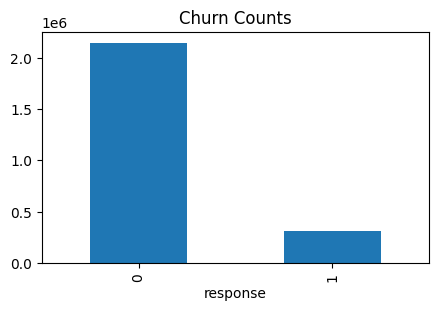

In [219]:
# Set the size of the plot
plt.figure(figsize=(5, 3))

#Count the numbers of churned and active customers
churn_counts = df['response'].value_counts()

#Plot
churn_counts.plot(kind='bar')
plt.xlabel('response')
plt.title('Churn Counts')
# Show the plot
plt.show()


### Analyzing Top Customers 

<Axes: xlabel='month_year'>

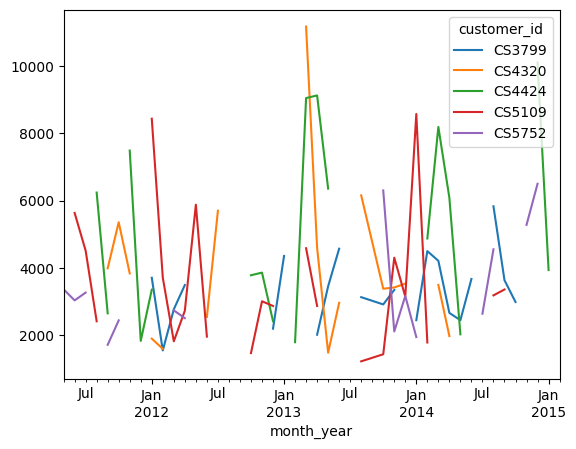

In [ ]:
# Top 5 customers
top_5_customers = monetary.sort_values(ascending=False).head(5).index

# Filter transactions of top 5 customers
top_customers_df = df[df['customer_id'].isin(top_5_customers)]

# Plot their monthly sales
top_customers_sales = top_customers_df.groupby(['customer_id', 'month_year'])['tran_amount'].sum().unstack(level=0)
top_customers_sales.plot(kind='line')

array([[<Axes: title={'center': 'trans_date'}>,
        <Axes: title={'center': 'month'}>],
       [<Axes: title={'center': 'tran_amount'}>,
        <Axes: title={'center': 'response'}>]], dtype=object)

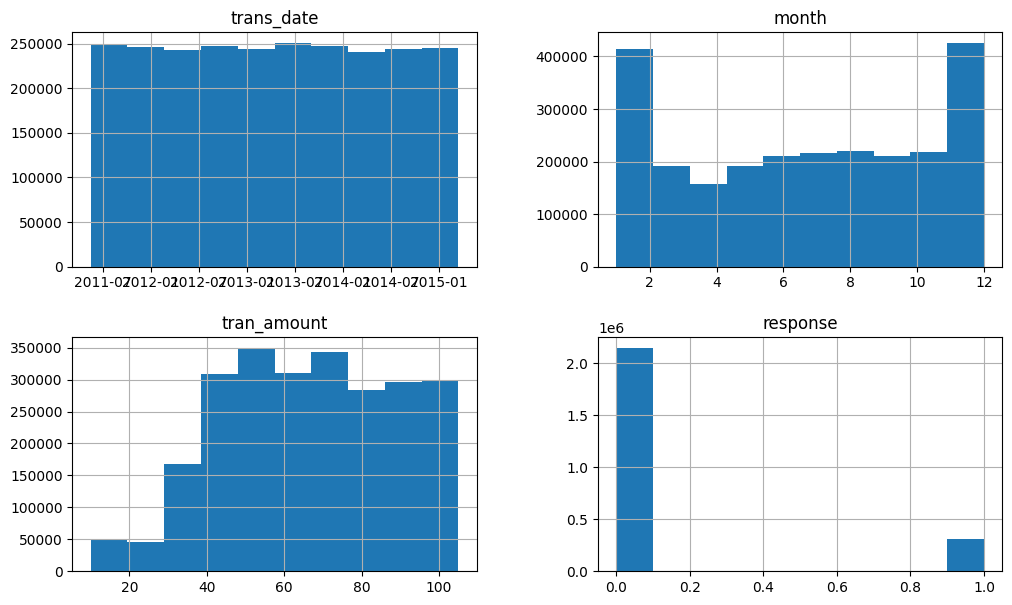

In [ ]:
#Analysis using hist plot

import matplotlib.pyplot as plt
%matplotlib inline

df.hist(figsize=(12,7))

c:\Users\HP\Documents\GitHub\reatil-Sale-Project\.env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\Documents\GitHub\reatil-Sale-Project\.env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\Documents\GitHub\reatil-Sale-Project\.env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


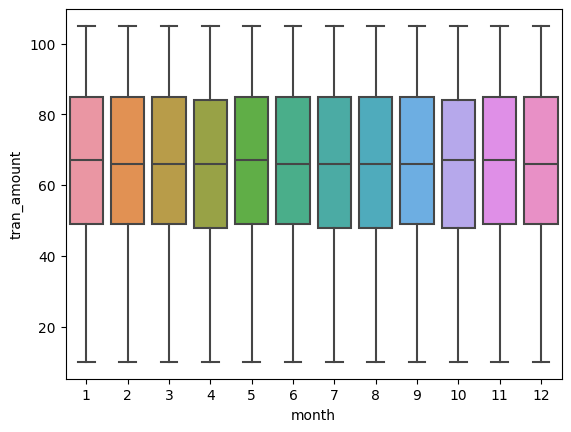

<Figure size 300x100 with 0 Axes>

In [ ]:
import seaborn as sns

sns.boxplot(x="month", y="tran_amount", data=df)
plt.figure(figsize=(3, 1))
plt.show()

In [ ]:
#Monthly Response
pd.crosstab(df['month'],df['response'])

response,0,1
month,,
1,191372,26801
2,173074,21942
3,168210,23565
4,135556,21435
5,166131,24391
6,183929,26825
7,188768,27677
8,190692,29262
9,183269,27138


c:\Users\HP\Documents\GitHub\reatil-Sale-Project\.env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\Documents\GitHub\reatil-Sale-Project\.env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\Documents\GitHub\reatil-Sale-Project\.env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\Documents\GitHub\reatil-Sale-Project\.env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

AttributeError: 'numpy.int64' object has no attribute 'startswith'

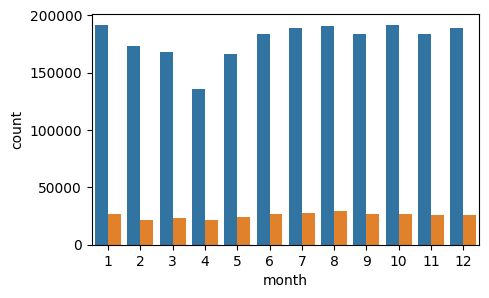

In [ ]:
plt.figure(figsize=(5, 3))
sns.countplot(x="month", hue="response", data=df)
plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Count of Responses by Month")
plt.legend(title="Response", loc="upper right")
plt.show()

<Figure size 100x200 with 0 Axes>

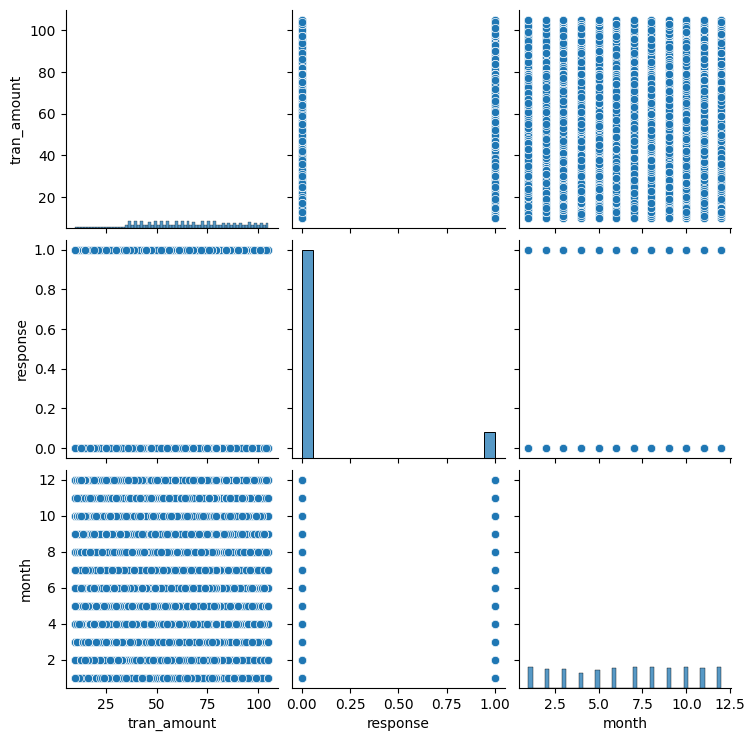

In [ ]:
plt.figure(figsize=(1, 2))
sns.pairplot(df)

C:\Users\Abhishek Mankar\AppData\Local\Temp\ipykernel_10324\276880328.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['tran_amount'])


<Axes: title={'center': 'Transaction amount by density'}, xlabel='tran_amount', ylabel='Density'>

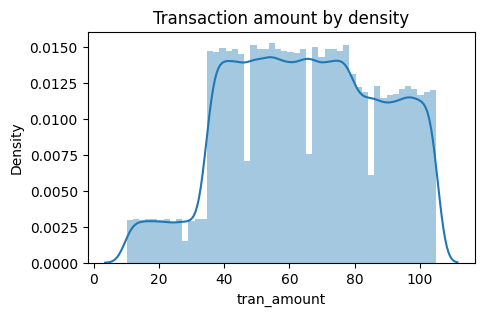

In [ ]:
plt.figure(figsize=(5, 3))
plt.title("Transaction amount by density")
sns.distplot(df['tran_amount'])

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

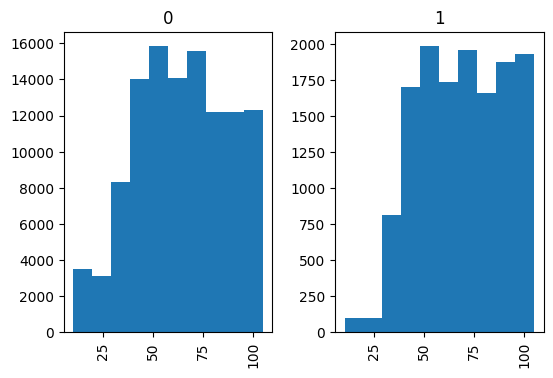

In [ ]:
df.hist(by='response',column = 'tran_amount',figsize=(6,4))

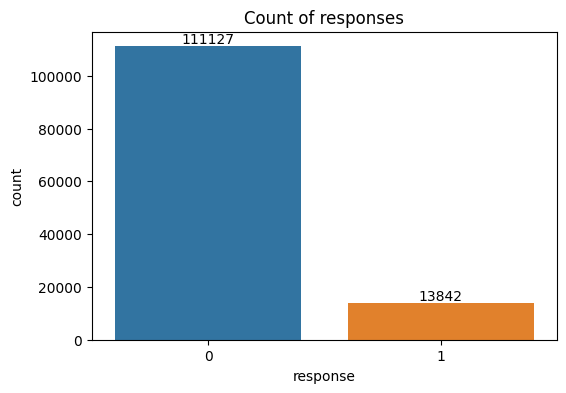

In [ ]:
# plotting a bar chart for Gender and it's count
plt.figure(figsize=(6, 4))
plt.title("Count of responses")
ax = sns.countplot(x ='response', data = df)

for bars in ax.containers:
    ax.bar_label(bars)

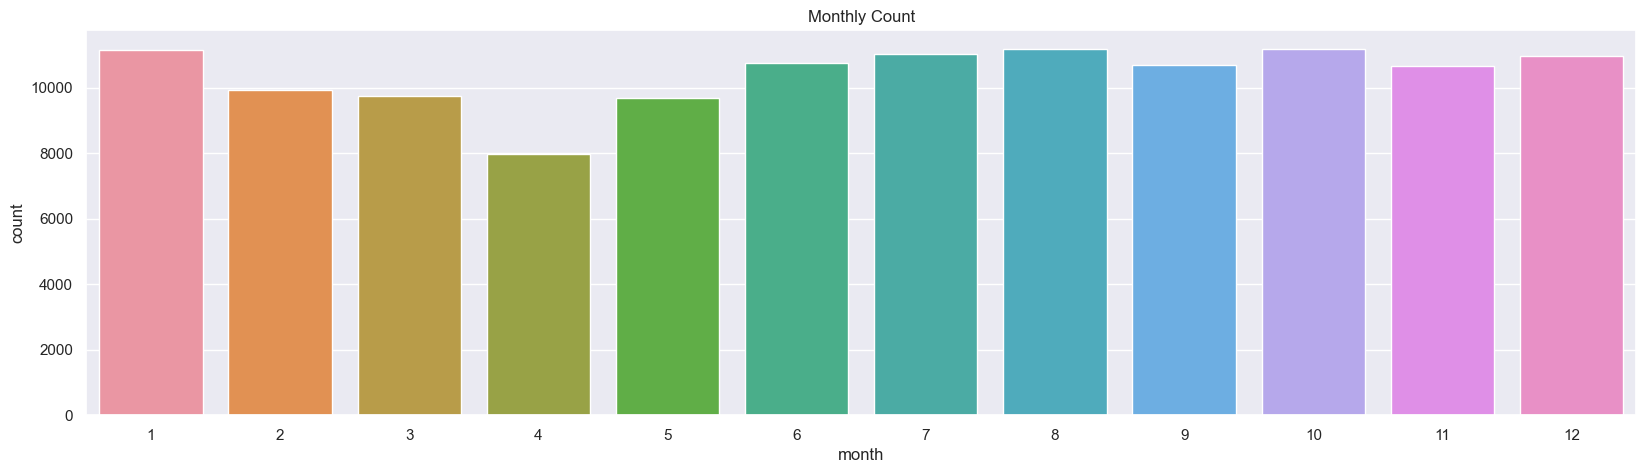

In [ ]:
plt.title("Monthly Count")
sns.set(rc={'figure.figsize':(20,9)})
ax = sns.countplot(data = df, x = 'month')
plt.show()

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='month_year'>

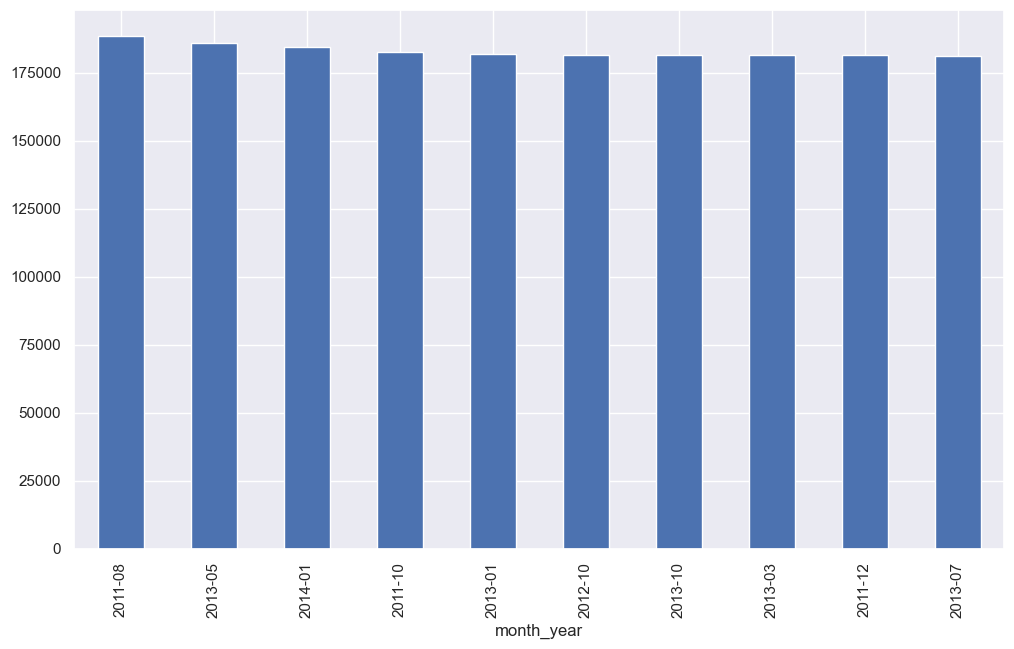

In [ ]:
# top 10 most sales months

fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('month_year')['tran_amount'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

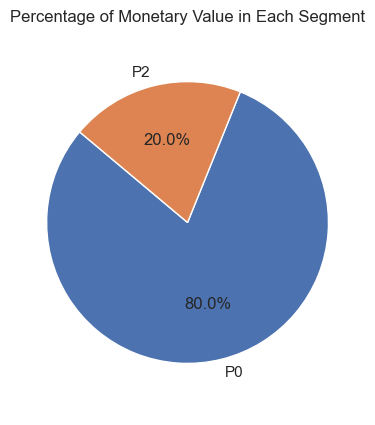

In [ ]:
#Total Sum of monetary distribution by segment

monetarypie = [6498293,1624085]
segment = ['P0','P2']

plt.figure(figsize=(4, 5))
plt.pie(monetarypie, labels=segment, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Monetary Value in Each Segment')
plt.axis('equal')
plt.show()